<a href="https://colab.research.google.com/github/RanganathJoshi/Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Necassary Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Fraud.csv')
df.head()

In [3]:
df=df['accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label'].str.split(",",expand=True)

In [4]:
df.head()

,0,1,2,3,4,5
0,29,1,4.745402,paypal,28.2048611111,0
1,725,1,4.742303,storecredit,0.0,0
2,845,1,4.921318,creditcard,0.0,0
3,503,1,4.886641,creditcard,0.0,0
4,2000,1,5.040929,creditcard,0.0,0


In [5]:
df=df.dropna(axis=0)

In [6]:
df

,0,1,2,3,4,5
0,29,1,4.745402,paypal,28.2048611111,0
1,725,1,4.742303,storecredit,0.0,0
2,845,1,4.921318,creditcard,0.0,0
3,503,1,4.886641,creditcard,0.0,0
4,2000,1,5.040929,creditcard,0.0,0
...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.0,0
39217,1647,1,4.876771,creditcard,377.930555556,0
39218,1591,1,4.742303,creditcard,0.0,0
39219,237,1,4.921318,creditcard,236.082638889,0


In [7]:
df.rename(columns = {0:'accountAgeDays',1:'numItems',2:'localTime',3:'paymentMethod',4:'paymentMethodAgeDays',5:'label'}, inplace = True)

In [8]:
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.2048611111,0
1,725,1,4.742303,storecredit,0.0,0
2,845,1,4.921318,creditcard,0.0,0
3,503,1,4.886641,creditcard,0.0,0
4,2000,1,5.040929,creditcard,0.0,0
...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.0,0
39217,1647,1,4.876771,creditcard,377.930555556,0
39218,1591,1,4.742303,creditcard,0.0,0
39219,237,1,4.921318,creditcard,236.082638889,0


#Making Sure there are no Null values in the dataset

In [9]:
#code
df.isna().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

> As you can see the Dataset is already Sort of Preprocesssed.

In [10]:
#Checking How many people actaully were invloved in Fruad Transaction
df['label'].value_counts()

0    38661
1      560
Name: label, dtype: int64

> 560 People Were Invloved In Fruad Transcation

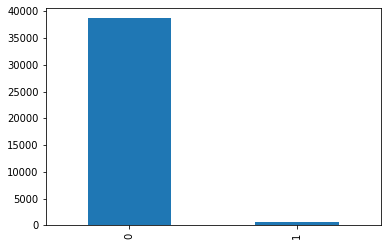

In [11]:
#Viduslizing..
df['label'].value_counts().plot.bar()

In [12]:
#Columns
df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')

#Visualizing the Relationship between the Features or Columns

In [13]:
#How many 'modes of Payments' are being actively used
df['paymentMethod'].unique() 

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

>Only 4!
* Hmmmmm


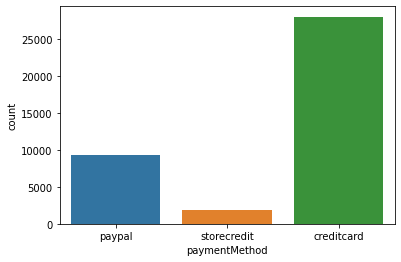

In [14]:
#How modes of Transactions affect Labels or Fruad Thing!
sns.countplot(x='paymentMethod',data=df)

> AS you can see,most of the people Use Credit Card


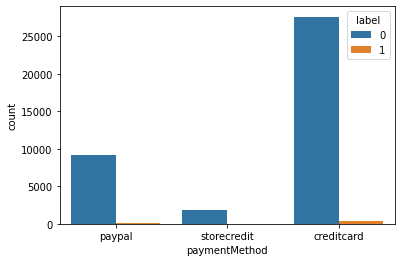

In [15]:
#Viewing The relationship between PaymentMethod and label
sns.countplot(x='paymentMethod',data=df,hue='label')

> As you can see,Credit card has more Anamolies than the rest

In [16]:
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.2048611111,0
1,725,1,4.742303,storecredit,0.0,0
2,845,1,4.921318,creditcard,0.0,0
3,503,1,4.886641,creditcard,0.0,0
4,2000,1,5.040929,creditcard,0.0,0
...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.0,0
39217,1647,1,4.876771,creditcard,377.930555556,0
39218,1591,1,4.742303,creditcard,0.0,0
39219,237,1,4.921318,creditcard,236.082638889,0


In [17]:
dumm_pay=pd.get_dummies(df['paymentMethod'])
dumm_pay

,creditcard,paypal,storecredit
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
39216,1,0,0
39217,1,0,0
39218,1,0,0
39219,1,0,0


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=True)

In [67]:
x_train,y_train

(       accountAgeDays  numItems  localTime  ...  creditcard  paypal  storecredit
 38657           864.0       1.0   4.057414  ...         1.0     0.0          0.0
 12816          1585.0       1.0   4.962055  ...         1.0     0.0          0.0
 7735            161.0       1.0   4.748314  ...         1.0     0.0          0.0
 28602          2000.0       1.0   5.017904  ...         1.0     0.0          0.0
 35482          2000.0       1.0   4.876771  ...         0.0     1.0          0.0
 ...               ...       ...        ...  ...         ...     ...          ...
 7813            660.0       1.0   4.921349  ...         1.0     0.0          0.0
 32511          1767.0       1.0   3.483951  ...         1.0     0.0          0.0
 5192           1758.0       1.0   4.876771  ...         0.0     1.0          0.0
 12172           399.0       1.0   4.745402  ...         1.0     0.0          0.0
 33003            26.0       3.0   4.836982  ...         1.0     0.0          0.0
 
 [27454 rows x

In [39]:
data=df.join(pd.get_dummies(df['paymentMethod']))

In [40]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,creditcard,paypal,storecredit
0,29,1,4.745402,paypal,28.2048611111,0,1,0
1,725,1,4.742303,storecredit,0.0,0,0,1
2,845,1,4.921318,creditcard,0.0,1,0,0
3,503,1,4.886641,creditcard,0.0,1,0,0
4,2000,1,5.040929,creditcard,0.0,1,0,0


In [52]:
data.drop(columns=['paymentMethod'],inplace=True)
data

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,creditcard,paypal,storecredit
0,29,1,4.745402,28.2048611111,0,1,0
1,725,1,4.742303,0.0,0,0,1
2,845,1,4.921318,0.0,1,0,0
3,503,1,4.886641,0.0,1,0,0
4,2000,1,5.040929,0.0,1,0,0
...,...,...,...,...,...,...,...
39216,986,1,4.836982,0.0,1,0,0
39217,1647,1,4.876771,377.930555556,1,0,0
39218,1591,1,4.742303,0.0,1,0,0
39219,237,1,4.921318,236.082638889,1,0,0


In [63]:
for k in data.columns:
  data[k]=data[k].astype('float32',)

#Now Lets Bring Logistic Regression into Action

In [68]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

*SO Here our Model has Learned,Now lets Evaluate our Model*

In [70]:
y_pred=regressor.predict(x_test)

In [71]:
#SO ,the predictions on the Unseen data are:
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

> But how Correct are our predictions!?

In [75]:
#Lets Check:
from sklearn.metrics import accuracy_score
#Lets Check the accuracy of the model
print(accuracy_score(y_pred,y_test)*100,"%")


100.0 %


> WOW!!!
> The Accuracy is 100% :)

In [76]:
#NOw lets Visualize our model Predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[11602,     0],
       [    0,   165]])

 ** AS you can see,there isn't even one Wrong Prediction!**
> This is an Ideal case bcoz any model cannot be 100% accurate!
> we got the accuracy as 1,bcoz the data was well preprocessed and  was Small enough!
> But Still it has 100% accuracy!
> HURRAY!!!!